# Importing libraries

In [ ]:
# import the necessary libraries 
!pip install empath

import pickle
import numpy as np
import nltk 
import string 
import re 
import inflect 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from empath import Empath
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
import time
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
lexicon = Empath()
p = inflect.engine() 

     |████████████████████████████████| 61kB 4.9MB/s 
  Created wheel for empath: filename=empath-0.89-cp36-none-any.whl size=57823 sha256=a14ea267f77f1d12394d4172265b34207d287ad7cf59a8142164a8628c34959f
  Stored in directory: /root/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
Successfully built empath


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## Extracting Dataset from zip

In [ ]:
import zipfile
with zipfile.ZipFile('./Fake.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
import zipfile
with zipfile.ZipFile('./True.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
import zipfile
with zipfile.ZipFile('./glovetwitter27b100dtxt.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
coviddf = pd.read_csv('COVID19FN.csv')
coviddf

,Unnamed: 0,Title,Text,country,Label,URL,len_sentences,source,text,date,avg_word_len
0,0,A video shows a fortune teller predicting the...,Circulating on social networks a video that sh...,Portugal,False,https://observador.pt/factchecks/fact-check-um...,83,https://observador.pt,circulating on social networks video that show...,08-04-2020,4.795181
1,1,Internet sensation and the worldâ€™s cutest ba...,Internet sensation and the world’s cutest baby...,India,False,https://www.newschecker.in/article/news-detail...,516,https://www.newschecker.in,internet sensation and the world cutest baby a...,17-04-2020,4.858527
2,2,A video has been viewed hundreds of thousands ...,A video has been viewed hundreds of thousands ...,Indonesia,False,https://factcheck.afp.com/video-shows-us-presi...,570,https://factcheck.afp.com,a video has been viewed hundreds of thousands ...,09-04-2020,5.010526
3,3,"Treasury is depositing Kshs 45, 000 to the mob...",A Facebook post claiming that the National Tre...,Kenya,False,https://pesacheck.org/false-treasury-is-not-se...,551,https://pesacheck.org,a facebook post claiming that the national tre...,11-04-2020,5.377495
4,4,Hunagrian authorities are capturing men 50 or ...,Moves on Facebook and Twitter a video showing ...,Mexico,False,https://www.animalpolitico.com/elsabueso/hungr...,368,https://www.animalpolitico.com,moves on facebook and twitter video showing po...,11-04-2020,5.032609
...,...,...,...,...,...,...,...,...,...,...,...
2816,2897,Did Chinese Doctors Confirm African People Are...,"In early 2020, an outbreak of new coronavirus ...",China,True,https://www.snopes.com/fact-check/coronavirus-...,25,https://www.snopes.com,in early an outbreak of new coronavirus in chi...,02-10-2020,5.360000
2817,2898,Anti-Lockdown Protests Originated With Tight-K...,"Organizers of “Operation Gridlock,” the first ...",United States,True,https://www.snopes.com/news/2020/05/20/michiga...,87,https://www.snopes.com,organizers of operation gridlock the first sig...,05-04-2020,5.494253
2818,2899,Does Pelosi Want ‘Guaranteed Minimum Incomes’ ...,"On May 4, 2020 — as federal leaders debated ho...",United States,True,https://www.snopes.com/fact-check/pelosi-stimu...,51,https://www.snopes.com,on may as federal leaders debated how to respo...,04-10-2020,5.745098
2819,2900,Did MSNBC Reporter Say ‘I Hope Coronavirus Kil...,"In March 2020, a message started to circulate ...",United States,True,https://www.snopes.com/fact-check/msnbc-hope-c...,33,https://www.snopes.com,in march message started to circulate on faceb...,04-01-2020,5.575758


# Getting Dataset into Dataframe

In [ ]:
fake=pd.read_csv('Fake.csv')
category=['FALSE']*(23481)
fk = fake
fake['Category']=category
# fake.head()

fk.head()

,title,text,subject,date,Category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FALSE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FALSE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FALSE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FALSE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FALSE


In [ ]:
true=pd.read_csv('True.csv')
category=['TRUE']*(21417)
tr = true

true['Category']=category
true.head()

tr.head()

,title,text,subject,date,Category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [ ]:
fake["subject"].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
true["subject"].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [ ]:
# tot=true.head(5000).append(fake.head(5000),ignore_index=True)
tot = coviddf;
df=tot
df.head()



,Unnamed: 0,Title,Text,country,Label,URL,len_sentences,source,text,date,avg_word_len
0,0,A video shows a fortune teller predicting the...,Circulating on social networks a video that sh...,Portugal,False,https://observador.pt/factchecks/fact-check-um...,83,https://observador.pt,circulating on social networks video that show...,08-04-2020,4.795181
1,1,Internet sensation and the worldâ€™s cutest ba...,Internet sensation and the world’s cutest baby...,India,False,https://www.newschecker.in/article/news-detail...,516,https://www.newschecker.in,internet sensation and the world cutest baby a...,17-04-2020,4.858527
2,2,A video has been viewed hundreds of thousands ...,A video has been viewed hundreds of thousands ...,Indonesia,False,https://factcheck.afp.com/video-shows-us-presi...,570,https://factcheck.afp.com,a video has been viewed hundreds of thousands ...,09-04-2020,5.010526
3,3,"Treasury is depositing Kshs 45, 000 to the mob...",A Facebook post claiming that the National Tre...,Kenya,False,https://pesacheck.org/false-treasury-is-not-se...,551,https://pesacheck.org,a facebook post claiming that the national tre...,11-04-2020,5.377495
4,4,Hunagrian authorities are capturing men 50 or ...,Moves on Facebook and Twitter a video showing ...,Mexico,False,https://www.animalpolitico.com/elsabueso/hungr...,368,https://www.animalpolitico.com,moves on facebook and twitter video showing po...,11-04-2020,5.032609


# Data Preprocessing

In [ ]:
# Convert to lowercase
def text_lowercase(text): 
	return text.lower() 
  
# convert number into words 
def convert_number(text): 
    # split string into list of words 
    temp_str = text.split() 
    # initialise empty list 
    new_string = [] 
  
    for word in temp_str: 
        # if word is a digit, convert the digit 
        # to numbers and append into the new_string list 
        if word.isdigit(): 
            temp = p.number_to_words(word) 
            new_string.append(temp) 
  
        # append the word as it is 
        else: 
            new_string.append(word) 
  
    # join the words of new_string to form a string 
    temp_str = ' '.join(new_string) 
    return temp_str 

# remove punctuation 
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 

# remove whitespace from text 
def remove_whitespace(text): 
    return  " ".join(text.split()) 
  
# remove stopwords function 
def remove_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return ' '.join(filtered_text)

# stem words in the list of tokenised words 
def stem_words(text): 
    word_tokens = word_tokenize(text) 
    stems = [stemmer.stem(word) for word in word_tokens] 
    return ' '.join(stems)

# lemmatize string 
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return ' '.join(lemmas)

def empath_feature_calc(text):
    try:
        return lexicon.analyze(text,normalize=True)
    except:
        return None

In [ ]:
df['text']=df['text'].apply(text_lowercase)
df['text']=df['text'].apply(convert_number)
df['text']=df['text'].apply(remove_punctuation)
df['text']=df['text'].apply(remove_whitespace)
df['text']=df['text'].apply(remove_stopwords)
df['text']=df['text'].apply(stem_words)
df['text']=df['text'].apply(lemmatize_word)

df.head()

AttributeError: ignored

In [ ]:
fake['text']=fake['text'].apply(text_lowercase)
fake['text']=fake['text'].apply(convert_number)
fake['text']=fake['text'].apply(remove_punctuation)
fake['text']=fake['text'].apply(remove_whitespace)
fake['text']=fake['text'].apply(remove_stopwords)
fake['text']=fake['text'].apply(stem_words)
fake['text']=fake['text'].apply(lemmatize_word)

fake.head()

,title,text,subject,date,Category
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish american happi new year leav...,News,"December 31, 2017",FALSE
1,Drunk Bragging Trump Staffer Started Russian ...,hous intellig committe chairman devin nune go ...,News,"December 31, 2017",FALSE
2,Sheriff David Clarke Becomes An Internet Joke...,friday reveal former milwauke sheriff david cl...,News,"December 30, 2017",FALSE
3,Trump Is So Obsessed He Even Has Obama’s Name...,christma day donald trump announc would back w...,News,"December 29, 2017",FALSE
4,Pope Francis Just Called Out Donald Trump Dur...,pope franci use annual christma day messag reb...,News,"December 25, 2017",FALSE


In [ ]:
true['text']=true['text'].apply(text_lowercase)
true['text']=true['text'].apply(convert_number)
true['text']=true['text'].apply(remove_punctuation)
true['text']=true['text'].apply(remove_whitespace)
true['text']=true['text'].apply(remove_stopwords)
true['text']=true['text'].apply(stem_words)
true['text']=true['text'].apply(lemmatize_word)

true.head()

KeyboardInterrupt: ignored

## **Analysis**


In [ ]:
df["subject"].value_counts()

KeyError: ignored

In [ ]:
df["Label"].value_counts()

False    1591
True     1230
Name: Label, dtype: int64

In [ ]:
category = df['Label'].value_counts()
subject = df['subject'].value_counts()
print(category)

TRUE     5000
FALSE    5000
Name: Category, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


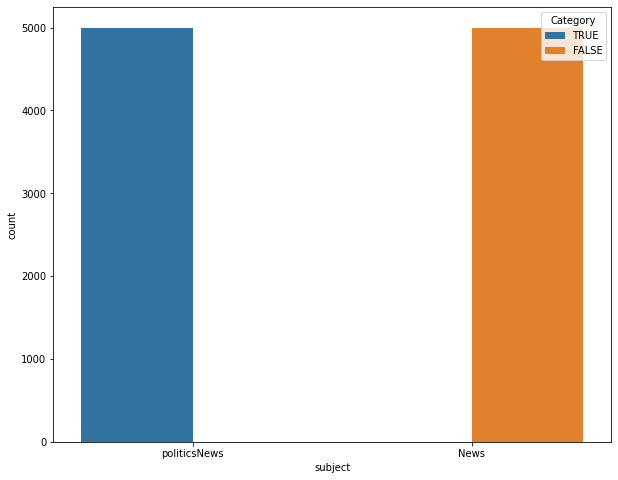

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot('subject',hue="Category",data=df)

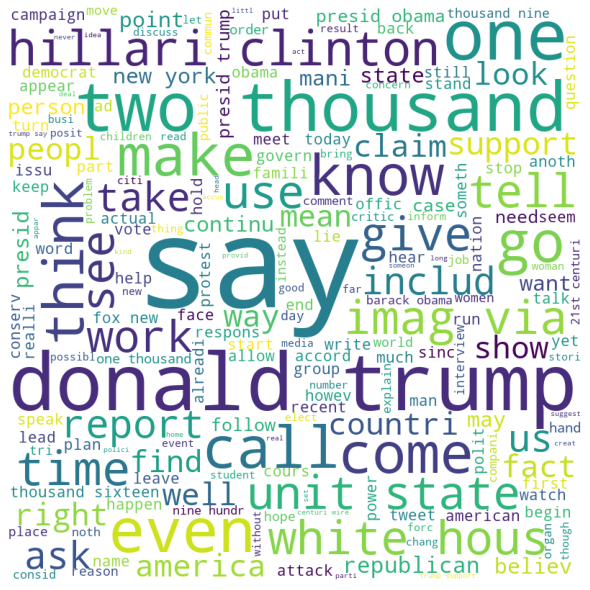

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
 
for val in fake["text"]: 
    val = str(val)  
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

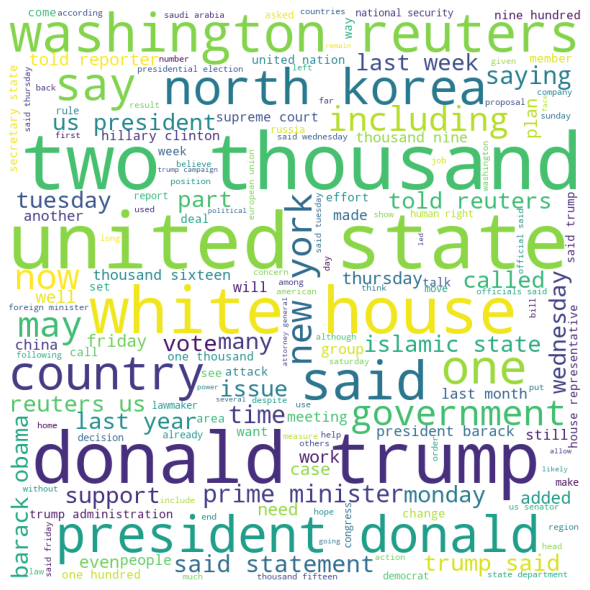

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
 
for val in true["text"]: 
    val = str(val)  
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Extracting Fine Grain Features with Empath 

In [ ]:
df['empath_features'] = df['text'].apply(empath_feature_calc)

In [ ]:
print(df.empath_features)

0       {'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...
1       {'help': 0.001937984496124031, 'office': 0.003...
2       {'help': 0.0, 'office': 0.008771929824561403, ...
3       {'help': 0.012704174228675136, 'office': 0.009...
4       {'help': 0.0, 'office': 0.005434782608695652, ...
                              ...                        
2816    {'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...
2817    {'help': 0.0, 'office': 0.022988505747126436, ...
2818    {'help': 0.0, 'office': 0.0, 'dance': 0.019607...
2819    {'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...
2820    {'help': 0.0, 'office': 0.0425531914893617, 'd...
Name: empath_features, Length: 2821, dtype: object


In [ ]:
newDF = pd.DataFrame(columns = list(df.empath_features[0].keys()))

exclude_idx = []
for i in range(df.shape[0]):
    dict_new_dataframe = df.empath_features.iloc[i]
    
    try:
        new_df = pd.DataFrame.from_dict(dict_new_dataframe.items()).transpose()
        header_new_dataframe = new_df.iloc[0]  # 0th index is header
        new_df = new_df[1:]  # fetch data except header
        new_df.columns = header_new_dataframe #set header as dataframe header in pandas
        newDF = newDF.append(new_df, ignore_index=True) # populate new dataframe with new data
    except:
        exclude_idx.append(i)
        pass

In [ ]:
# 194 categories converted into attributes for each row present in original dataset..
newDF.head()

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,...,car,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0120482,0,0,0,0,0,0,0,0,0,0,0.0120482,0,0,0,0.0120482,0,...,0,0,0.0120482,0,0,0,0,0,0.0240964,0,0,0,0,0,0.0120482,0,0,0,0,0.0120482,0,0.060241,0,0,0,0,0,0,0,0.0240964,0,0.0240964,0,0,0,0,0.0120482,0,0,0.0481928
1,0.00193798,0.00387597,0,0,0,0.00193798,0,0.00581395,0,0.0116279,0,0.00193798,0,0,0,0.0135659,0.00581395,0,0,0,0,0.00968992,0,0.00387597,0,0,0,0,0,0,0.0116279,0,0,0.00193798,0,0,0,0,0,0,...,0,0.00193798,0.0193798,0,0.00775194,0,0,0,0,0,0,0,0.0116279,0,0.0116279,0,0,0,0,0.00581395,0,0.0523256,0,0,0.0290698,0,0,0,0,0.0271318,0,0.0426357,0,0,0.00193798,0.0135659,0.00387597,0,0,0.0310078
2,0,0.00877193,0.00175439,0,0.00877193,0.00350877,0.00175439,0.00350877,0,0,0,0,0.0122807,0,0,0.00175439,0,0,0,0,0,0.00350877,0.00175439,0,0,0.00701754,0,0,0,0,0,0.00175439,0,0,0,0.00526316,0,0,0.00175439,0.00350877,...,0,0.00175439,0.00350877,0,0,0.00175439,0,0,0.0122807,0,0,0,0,0,0,0,0,0.00526316,0,0.00175439,0,0.0280702,0,0.00701754,0,0,0.00175439,0,0,0,0,0,0,0,0.0157895,0,0.00350877,0,0,0.0245614
3,0.0127042,0.00907441,0,0.0290381,0.00362976,0.00181488,0,0.00181488,0.00181488,0,0,0,0.00181488,0,0,0.00544465,0.00544465,0.00181488,0,0,0,0,0,0.0145191,0,0.0399274,0.00181488,0,0,0.00181488,0,0.0108893,0.0108893,0.00725953,0,0.0108893,0,0.00181488,0.00725953,0,...,0.00362976,0,0.0145191,0,0.00362976,0,0,0,0.00362976,0.00181488,0,0.00181488,0.0108893,0,0,0,0,0,0.0163339,0.00181488,0.00181488,0.00725953,0,0.0145191,0.00181488,0.0235935,0,0,0.00181488,0,0,0,0,0.00181488,0.0127042,0,0,0.00544465,0,0
4,0,0.00543478,0,0,0,0,0,0.00271739,0,0,0,0.013587,0,0,0,0.00271739,0.00271739,0.0108696,0,0,0.00271739,0,0,0.00271739,0,0.0271739,0,0,0,0,0,0,0,0.00815217,0,0,0,0,0.00271739,0,...,0,0.00815217,0,0,0,0.0108696,0.00271739,0.00543478,0,0.00815217,0,0,0,0,0,0,0,0,0.00271739,0.00543478,0,0.0217391,0,0.0271739,0.00271739,0,0,0,0,0,0.00271739,0.00271739,0,0,0,0,0.00271739,0,0,0.0190217


In [ ]:
print(df.Label.shape)
category_in_original_dataframe=df.Label

print(len(category_in_original_dataframe))

for idx in exclude_idx:
  if(idx in category_in_original_dataframe):
    category_in_original_dataframe.pop(idx)

print(category_in_original_dataframe) 

newDF.reset_index(inplace=True)
newDF.drop(columns=['index'],inplace=True)

tempDF=pd.DataFrame(category_in_original_dataframe)

tempDF.reset_index(inplace=True)
tempDF.drop(columns=['index'],inplace=True)

newDF['Label']=tempDF

print(newDF)

(2821,)
2821
0       False
1       False
2       False
3       False
4       False
        ...  
2816     True
2817     True
2818     True
2819     True
2820     True
Name: Label, Length: 2814, dtype: bool
0           help      office       dance  ... positive_emotion    musical  Label
0              0           0           0  ...                0  0.0481928  False
1     0.00193798  0.00387597           0  ...                0  0.0310078  False
2              0  0.00877193  0.00175439  ...                0  0.0245614  False
3      0.0127042  0.00907441           0  ...                0          0  False
4              0  0.00543478           0  ...                0  0.0190217  False
...          ...         ...         ...  ...              ...        ...    ...
2809           0           0           0  ...                0          0   True
2810           0   0.0229885           0  ...        0.0114943          0   True
2811           0           0   0.0196078  ...                0   

In [ ]:
latestDF=newDF
latestDF

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0120482,0,0,0,0,0,0,0,0,0,0,0.0120482,0,0,0,0.0120482,0,...,0,0.0120482,0,0,0,0,0,0.0240964,0,0,0,0,0,0.0120482,0,0,0,0,0.0120482,0,0.060241,0,0,0,0,0,0,0,0.0240964,0,0.0240964,0,0,0,0,0.0120482,0,0,0.0481928,False
1,0.00193798,0.00387597,0,0,0,0.00193798,0,0.00581395,0,0.0116279,0,0.00193798,0,0,0,0.0135659,0.00581395,0,0,0,0,0.00968992,0,0.00387597,0,0,0,0,0,0,0.0116279,0,0,0.00193798,0,0,0,0,0,0,...,0.00193798,0.0193798,0,0.00775194,0,0,0,0,0,0,0,0.0116279,0,0.0116279,0,0,0,0,0.00581395,0,0.0523256,0,0,0.0290698,0,0,0,0,0.0271318,0,0.0426357,0,0,0.00193798,0.0135659,0.00387597,0,0,0.0310078,False
2,0,0.00877193,0.00175439,0,0.00877193,0.00350877,0.00175439,0.00350877,0,0,0,0,0.0122807,0,0,0.00175439,0,0,0,0,0,0.00350877,0.00175439,0,0,0.00701754,0,0,0,0,0,0.00175439,0,0,0,0.00526316,0,0,0.00175439,0.00350877,...,0.00175439,0.00350877,0,0,0.00175439,0,0,0.0122807,0,0,0,0,0,0,0,0,0.00526316,0,0.00175439,0,0.0280702,0,0.00701754,0,0,0.00175439,0,0,0,0,0,0,0,0.0157895,0,0.00350877,0,0,0.0245614,False
3,0.0127042,0.00907441,0,0.0290381,0.00362976,0.00181488,0,0.00181488,0.00181488,0,0,0,0.00181488,0,0,0.00544465,0.00544465,0.00181488,0,0,0,0,0,0.0145191,0,0.0399274,0.00181488,0,0,0.00181488,0,0.0108893,0.0108893,0.00725953,0,0.0108893,0,0.00181488,0.00725953,0,...,0,0.0145191,0,0.00362976,0,0,0,0.00362976,0.00181488,0,0.00181488,0.0108893,0,0,0,0,0,0.0163339,0.00181488,0.00181488,0.00725953,0,0.0145191,0.00181488,0.0235935,0,0,0.00181488,0,0,0,0,0.00181488,0.0127042,0,0,0.00544465,0,0,False
4,0,0.00543478,0,0,0,0,0,0.00271739,0,0,0,0.013587,0,0,0,0.00271739,0.00271739,0.0108696,0,0,0.00271739,0,0,0.00271739,0,0.0271739,0,0,0,0,0,0,0,0.00815217,0,0,0,0,0.00271739,0,...,0.00815217,0,0,0,0.0108696,0.00271739,0.00543478,0,0.00815217,0,0,0,0,0,0,0,0,0.00271739,0.00543478,0,0.0217391,0,0.0271739,0.00271739,0,0,0,0,0,0.00271739,0.00271739,0,0,0,0,0.00271739,0,0,0.0190217,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.04,...,0,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
2810,0,0.0229885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0114943,0,0.0114943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0.0114943,0,0,0,0,0,0,0,0,0,0.0114943,0,0.0114943,0,0,0,0,0,0,0.0114943,0,0,0,0.0114943,0,0,0,0.0114943,0,True
2811,0,0,0.0196078,0,0,0.0196078,0,0,0,0,0,0,0,0,0,0,0,0.0196078,0,0,0,0,0,0,0,0.0784314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0196078,0,0,0,0.0196078,0,0,0,0,0,0.0196078,0.0196078,0,0.0196078,0,0.0588235,0,0,0,0,0,0,0,0,0,0,0,0.0196078,0,0,0,0,True
2812,0,0,0,0,0,0,0,0.030303,0,0.030303,0,0.030303,0,0,0,0,0,0.030303,0,0,0.030303,0.030303,0,0,0,0.030303,0.030303,0,0,0,0.0606061,0,0,0,0,0,0,0,0,0,...,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0.0606061,0,0,0,0,0.0606061,0,0.030303,0,0,0,0,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,True


In [ ]:
deceptive_news=latestDF[latestDF['Label']==0]
print(deceptive_news)

0           help      office       dance  ... positive_emotion     musical  Label
0              0           0           0  ...                0   0.0481928  False
1     0.00193798  0.00387597           0  ...                0   0.0310078  False
2              0  0.00877193  0.00175439  ...                0   0.0245614  False
3      0.0127042  0.00907441           0  ...                0           0  False
4              0  0.00543478           0  ...                0   0.0190217  False
...          ...         ...         ...  ...              ...         ...    ...
1605           0   0.0465116           0  ...                0           0  False
1606           0   0.0016835           0  ...       0.00505051           0  False
1607  0.00207684  0.00519211  0.00103842  ...                0  0.00311526  False
1609   0.0175439   0.0292398           0  ...                0  0.00584795  False
1610  0.00421053           0           0  ...                0           0  False

[1591 rows x 19

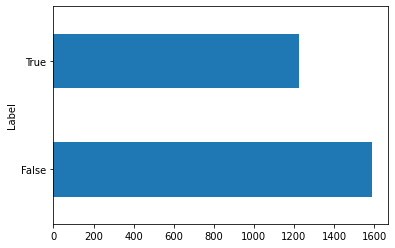

In [ ]:
latestDF.groupby(['Label']).size().plot(kind='barh')

In [ ]:
latestDF["Label"].value_counts()

False    1591
True     1223
Name: Label, dtype: int64

In [ ]:
def test_models(models,X_train, X_test, y_train, y_test):
    start = time.time()
    score=[]
    acc=[]
    for model_name in models:
        model=model_name
        model.fit(X_train,y_train)
        y_test_hat=model.predict(X_test)
        ac=accuracy_score(y_test_hat,y_test)
        cm=confusion_matrix(y_test, y_test_hat)

        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        # Precision or positive predictive value
        PPV = TP/(TP+FP)
        # Negative predictive value
        NPV = TN/(TN+FN)
        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        # False negative rate
        FNR = FN/(TP+FN)
        # False discovery rate
        FDR = FP/(TP+FP)

        # Overall accuracy
        ACC = (TP+TN)/(TP+FP+FN+TN)

        model_score=round(model.score(X_test, y_test), 2) 
        score.append(model_score)
        acc.append(ACC)

        print('%s Overall accuracy:' % model_name, ACC)
        end = time.time()
        print('Execution Time:', end-start)
    print("Corresponsing models used:-",models)
    print("F1Score is :",score)
    print("Accuracy is:",acc)  

In [ ]:
columns=latestDF.columns[:-1]

x=latestDF[columns]
y=latestDF['Label']

# Wordcloud

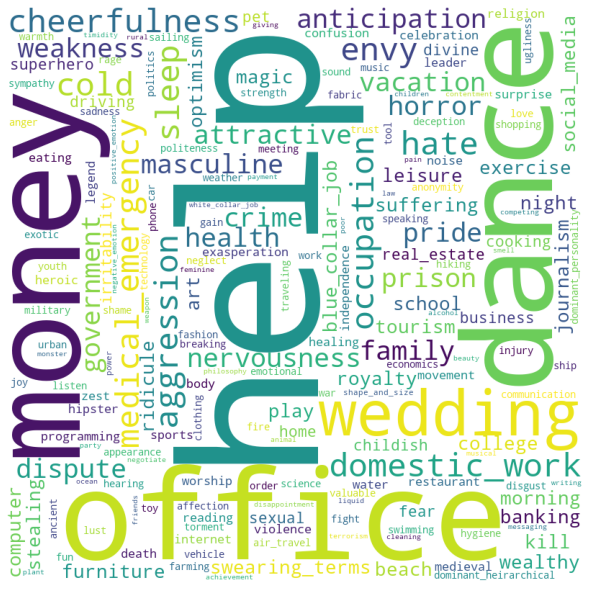

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 


for val in columns: 
    val = str(val)  
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Training Models

In [ ]:
lr = LogisticRegression()
dt=DecisionTreeClassifier()
extraTree=ExtraTreesClassifier()
naive=GaussianNB()
lda=LinearDiscriminantAnalysis()
clf = SVC(kernel='linear')
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn3 = KNeighborsClassifier(n_neighbors = 3) 
knn4 = KNeighborsClassifier(n_neighbors = 4) 
gbc = GradientBoostingClassifier(random_state=0)
regressor = RandomForestClassifier(n_estimators = 100)
bagging=BaggingClassifier()

models=[]
models.append(lr)
models.append(dt)
models.append(naive)
models.append(lda)
models.append(clf)
models.append(knn2)
models.append(knn3)
models.append(knn4)
models.append(gbc)
models.append(regressor)
models.append(bagging)
models.append(extraTree)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=42)

test_models(models,X_train, X_test, y_train, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) Overall accuracy: [0.75147929 0.75147929]
Execution Time: 0.06509256362915039
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') Overall accuracy: [0.8887574 0.8887574]
Execution Time: 0.308605432510376
GaussianNB(priors=None, var_smoothing=1e-09) Overall accuracy: [0.76213018 0.76213018]
Executio

Extracting Coarse-Grained Features 


In [ ]:
tr['Label'] = 1
fk['Label'] = 0
tr.head()
fk.head()

,title,text,subject,date,Category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
dfCoarse = pd.concat([tr.head(5000), fk.head(5000)]) #Merging the 2 datasets
dfCoarse.tail()
dfCoarse=dfCoarse.reset_index()
dfCoarse.drop(columns=['index'],inplace = True)
dfCoarse.head()

,title,text,subject,date,Category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
dfCoarse.isna().sum()
dfCoarse.title.count()
dfCoarse.subject.value_counts()

politicsNews    5000
News            5000
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'), Text(0, 0, 'News')]

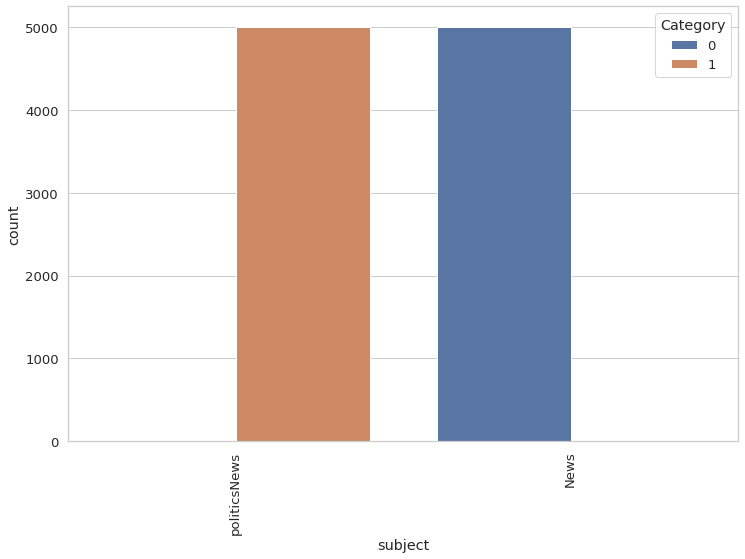

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "Category" , data = dfCoarse)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [ ]:
dfCoarse['text'] = dfCoarse['text'] + " " + dfCoarse['title']
del dfCoarse['title']
del dfCoarse['subject']
del dfCoarse['date']
dfCoarse.head()

,text,Category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
dfCoarse['text']=dfCoarse['text'].apply(denoise_text)

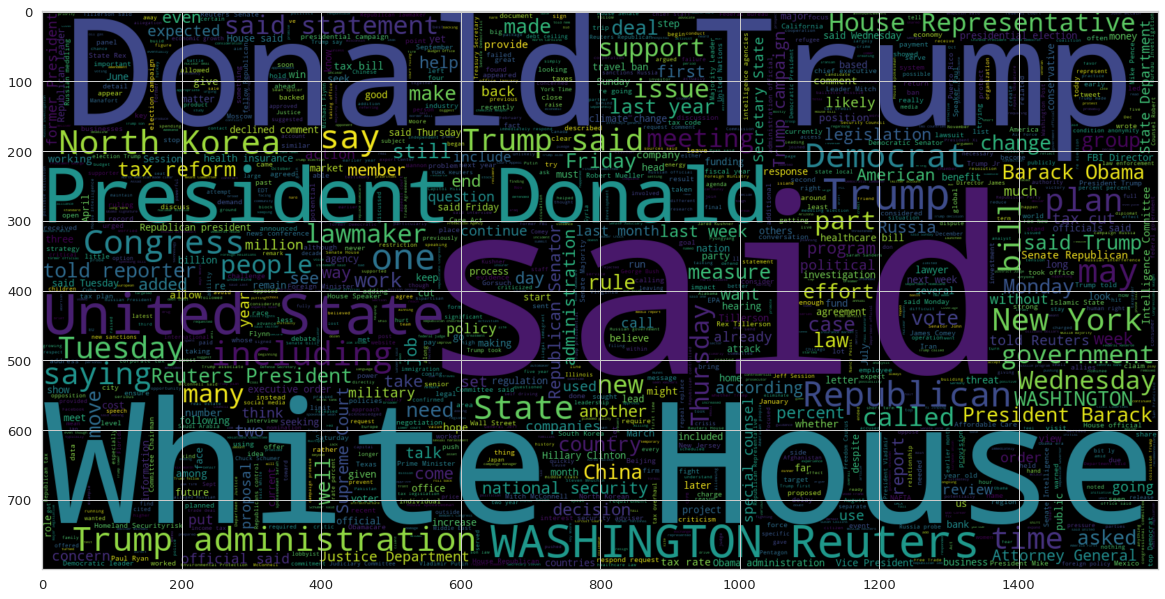

In [ ]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(dfCoarse[dfCoarse.Category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

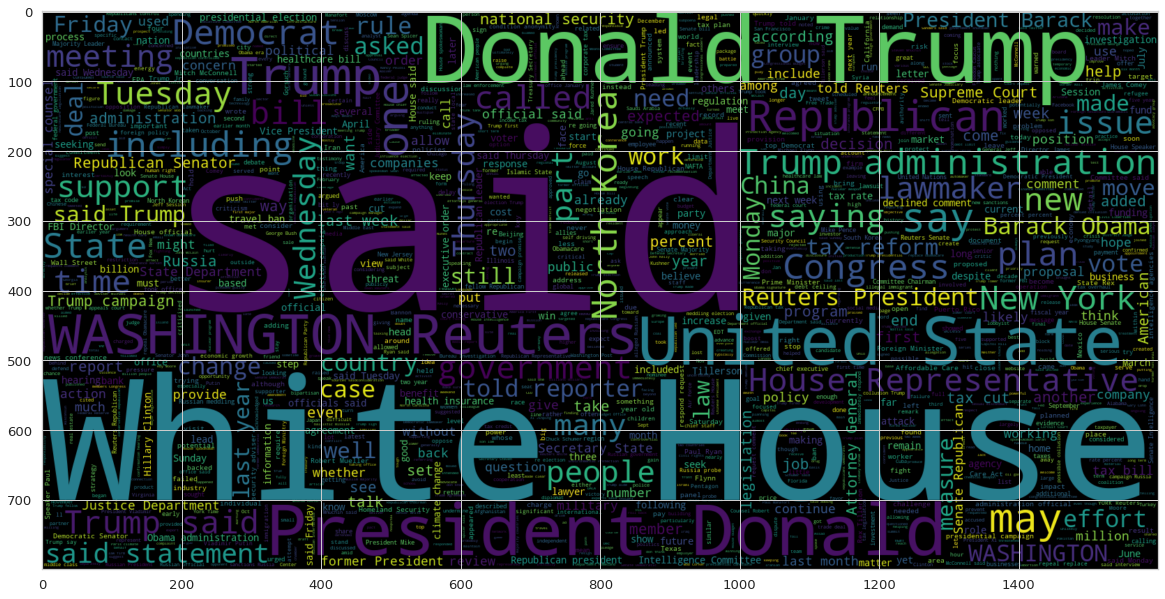

In [ ]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(dfCoarse[dfCoarse.Category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')


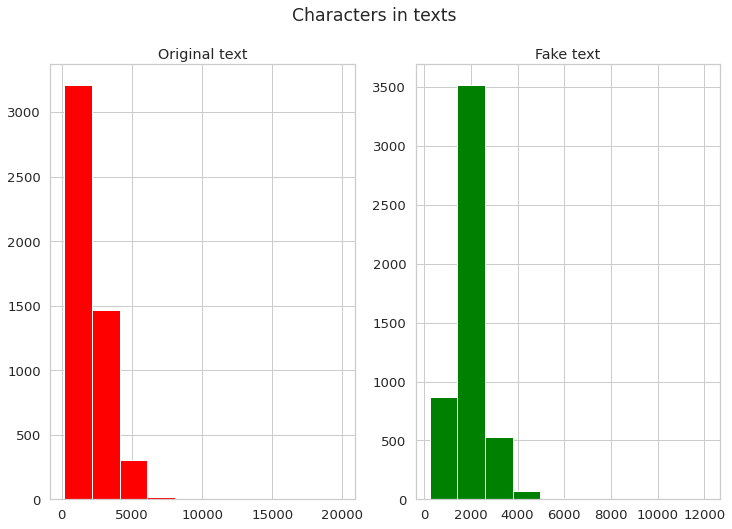

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=dfCoarse[dfCoarse['Category']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=dfCoarse[dfCoarse['Category']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

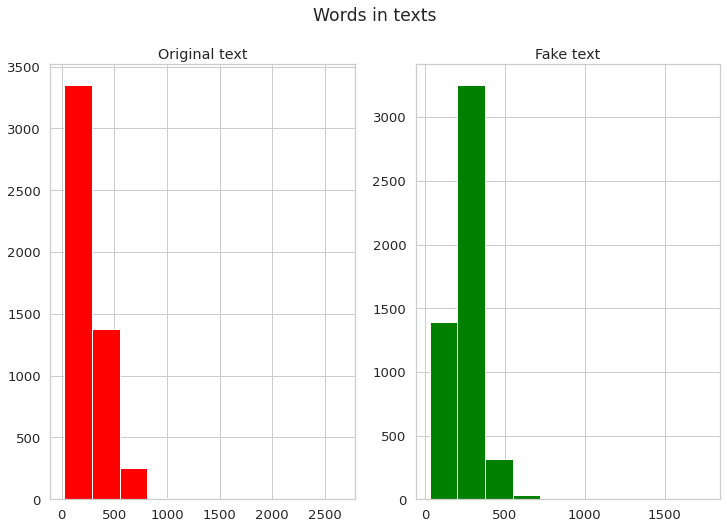

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=dfCoarse[dfCoarse['Category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=dfCoarse[dfCoarse['Category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each text')

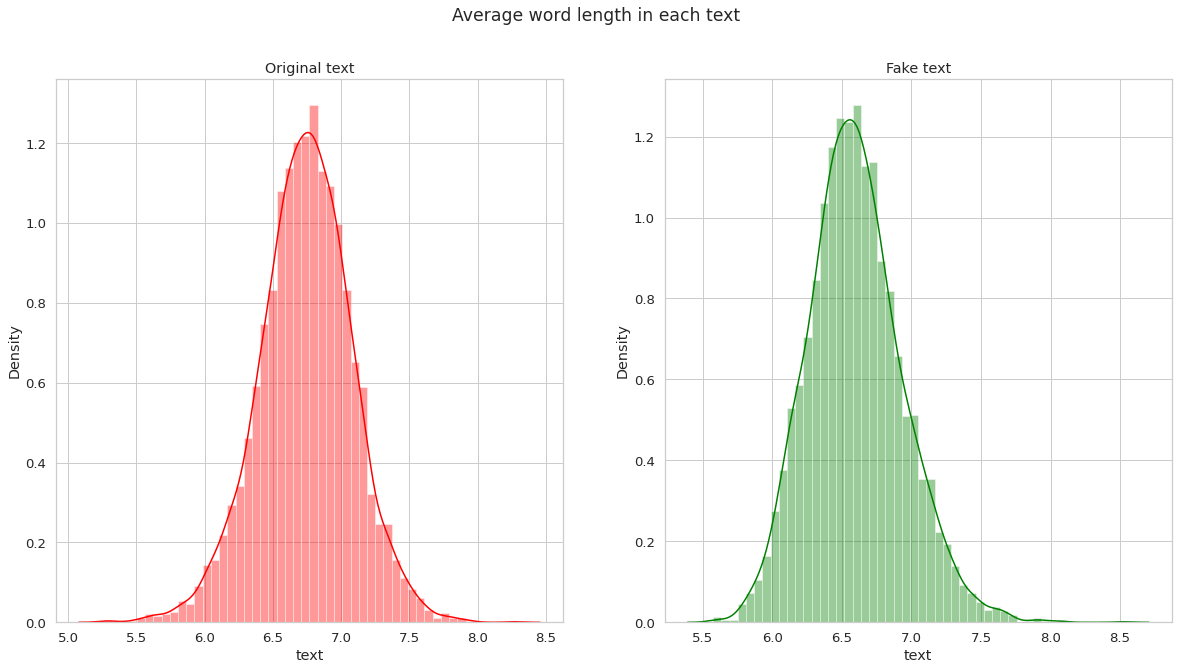

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=dfCoarse[dfCoarse['Category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=dfCoarse[dfCoarse['Category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(dfCoarse.text)
corpus[:5]

['WASHINGTON', '(Reuters)', 'head', 'conservative', 'Republican']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Donald': 11446,
 'House': 10519,
 'President': 9427,
 'Republican': 7513,
 'Trump': 48818,
 'U.S.': 15679,
 'White': 7217,
 'people': 7883,
 'said': 21348,
 'would': 14756}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

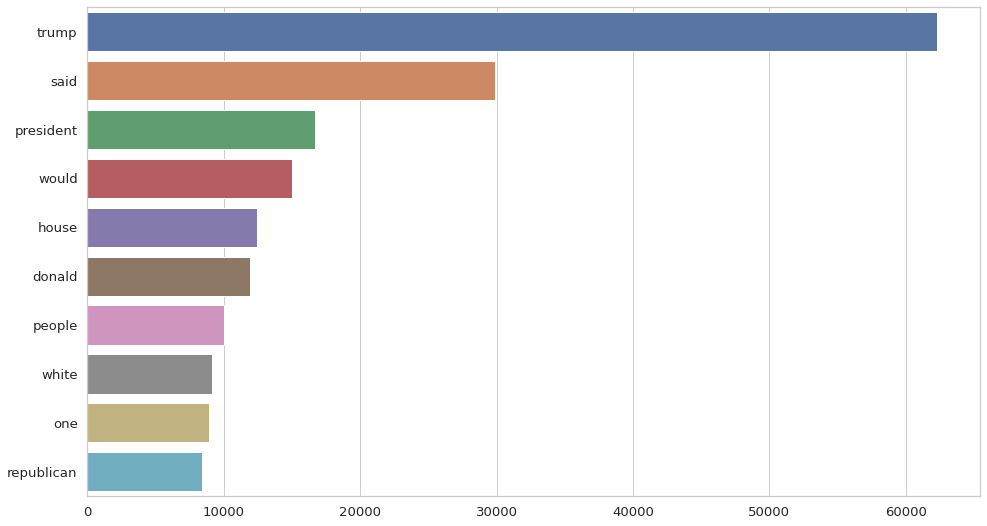

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(dfCoarse.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

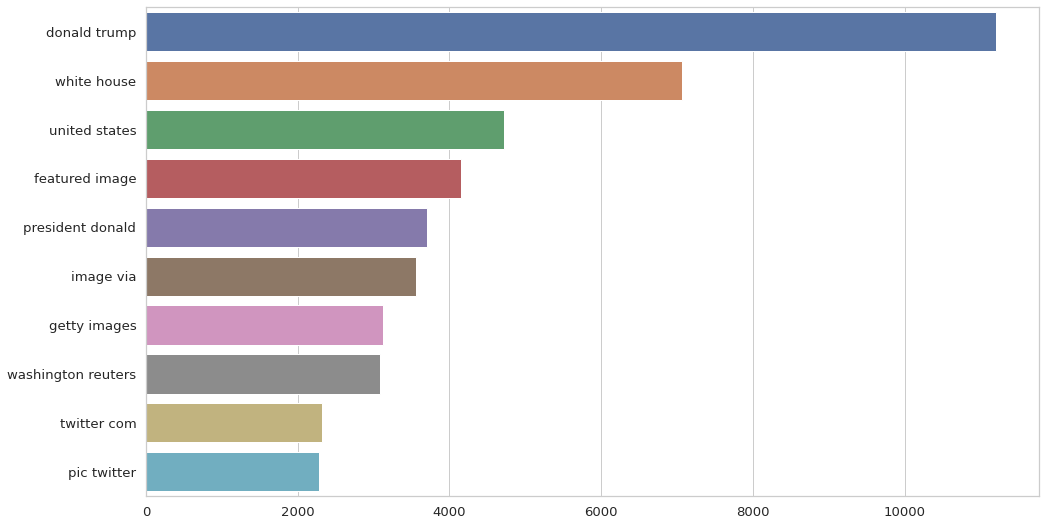

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(dfCoarse.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

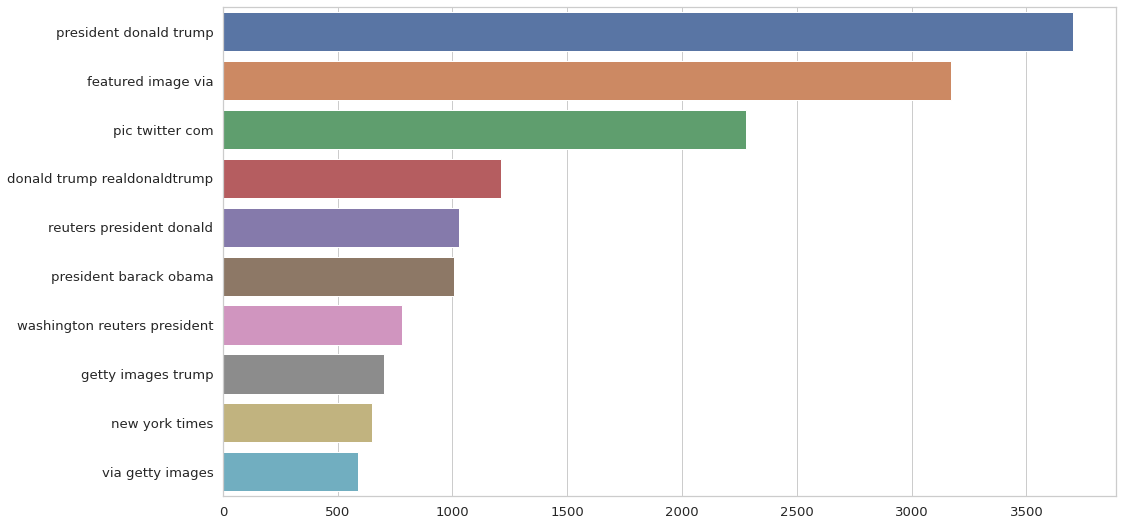

In [ ]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(dfCoarse.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

In [ ]:
x_training,x_testing,y_training,y_testing = train_test_split(dfCoarse.text,dfCoarse.Category,random_state = 0)
max_features = 10000
maxlen = 300

In [ ]:
from keras.preprocessing import text, sequence
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_training)
tokenized_train = tokenizer.texts_to_sequences(x_training)
x_training = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(x_testing)
X_testing = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [ ]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"virenkathiriya","key":"e40971a8871ea734bcd6672d5a46ca7d"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d bertcarremans/glovetwitter27b100dtxt

100% 396M/397M [00:17<00:00, 16.5MB/s]
100% 397M/397M [00:17<00:00, 24.5MB/s]


In [ ]:
EMBEDDING_FILE = './glove.twitter.27B.100d.txt'
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [ ]:
batch_size = 256
epochs = 10
embed_size = 100

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 300, 128)          117248    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
history = model.fit(x_training, y_training, batch_size = batch_size , validation_data = (X_testing,y_testing) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/10
30/30 [==============================] - 107s 4s/step - loss: 0.2168 - accuracy: 0.8917 - val_loss: 0.0173 - val_accuracy: 0.9948
Epoch 2/10
30/30 [==============================] - 106s 4s/step - loss: 0.0256 - accuracy: 0.9943 - val_loss: 0.0154 - val_accuracy: 0.9964
Epoch 3/10
30/30 [==============================] - 106s 4s/step - loss: 0.0175 - accuracy: 0.9961 - val_loss: 0.0101 - val_accuracy: 0.9976
Epoch 4/10
30/30 [==============================] - 106s 4s/step - loss: 0.0122 - accuracy: 0.9971 - val_loss: 0.0114 - val_accuracy: 0.9976
Epoch 5/10
30/30 [==============================] - 107s 4s/step - loss: 0.0091 - accuracy: 0.9980 - val_loss: 0.0064 - val_accuracy: 0.9984
Epoch 6/10
30/30 [==============================] - 106s 4s/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 7/10
30/30 [==============================] - 106s 4s/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0077 - val_accuracy: 0.9980
Epoch 8/10
30

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_training,y_training)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_testing,y_testing)[1]*100 , "%")

235/235 [==============================] - 28s 118ms/step - loss: 1.1908e-04 - accuracy: 1.0000
Accuracy of the model on Training Data is -  100.0 %
79/79 [==============================] - 9s 115ms/step - loss: 0.0081 - accuracy: 0.9988
Accuracy of the model on Testing Data is -  99.8799979686737 %


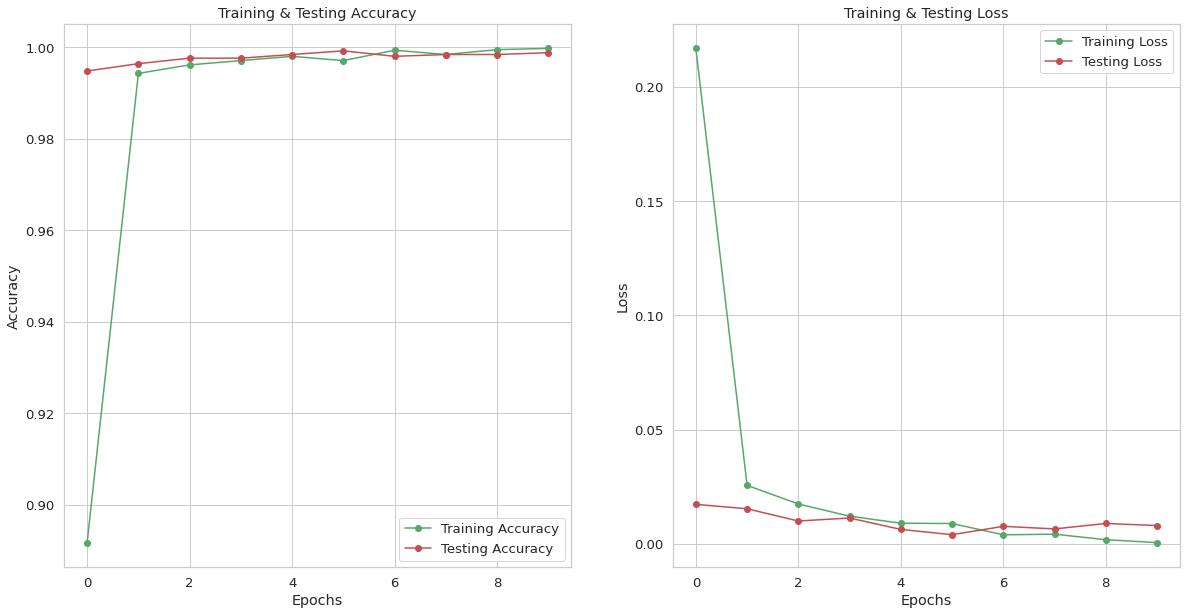

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = model.predict_classes(X_testing)
pred[:5]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [1],
       [1],
       [0],
       [1]], dtype=int32)

In [ ]:
print(classification_report(y_testing, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      1237
    Not Fake       1.00      1.00      1.00      1263

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [ ]:
cm = confusion_matrix(y_testing,pred)
cm

array([[1236,    1],
       [   2, 1261]])

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(63.5, 0.5, 'Actual')

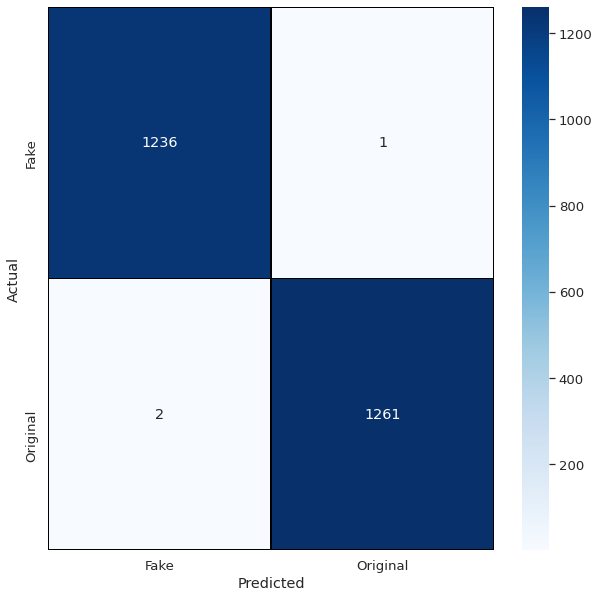

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")